In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pylab as pl
from IPython import display

In [6]:
def check_dead_end(obs_map, pos, direction):
    x, y = pos
    tunnel=[]
    deadend=0
    limit = obs_map.shape[0]-1
    if direction=='down':
        for i in obs_map[x:,y]:
            tunnel.append(i)
            if i == 1:
                break
    elif direction=='up':
        for i in list(obs_map[:x+1,y])[::-1]:
            tunnel.append(i)
            if i == 1:
                break
    elif direction=='left':
        for i in list(obs_map[x,:y+1])[::-1]:
            tunnel.append(i)
            if i == 1:
                break
    elif direction=='right':
        for i in list(obs_map[x,y:]):
            tunnel.append(i)
            if i == 1:
                break

    if sum(tunnel)==0:
        tunnel.append(1)

    if direction=="down":
        if y==0:
            sidewalk1=list(obs_map[x+1:x+len(tunnel)-1, y+1])
        elif y==limit:
            sidewalk2=list(obs_map[x+1:x+len(tunnel)-1, y-1])
        else:
            sidewalk1=list(obs_map[x+1:x+len(tunnel)-1, y+1])
            sidewalk2=list(obs_map[x+1:x+len(tunnel)-1, y-1])
        check_var=y
    elif direction=="up":
        if y==0:
            sidewalk1=list(obs_map[x-len(tunnel)+2:x, y+1])
        elif y==limit:
            sidewalk2=list(obs_map[x-len(tunnel)+2:x, y-1])
        else:
            sidewalk1=list(obs_map[x-len(tunnel)+2:x, y+1])
            sidewalk2=list(obs_map[x-len(tunnel)+2:x, y-1])
        check_var=y
    elif direction=="right":
        if x==0:
            sidewalk1=list(obs_map[x+1, y+1:y+len(tunnel)-1])
        elif x==limit:
            sidewalk2=list(obs_map[x-1, y+1:y+len(tunnel)-1])
        else:
            sidewalk1=list(obs_map[x+1, y+1:y+len(tunnel)-1])
            sidewalk2=list(obs_map[x-1, y+1:y+len(tunnel)-1])
        check_var=x
    elif direction=="left":
        if x==0:
            sidewalk1=list(obs_map[x+1, y-len(tunnel)+2:y])
        elif x==limit:
            sidewalk2=list(obs_map[x-1, y-len(tunnel)+2:y])
        else:
            sidewalk1=list(obs_map[x+1, y-len(tunnel)+2:y])
            sidewalk2=list(obs_map[x-1, y-len(tunnel)+2:y])
        check_var=x

    if len(tunnel)>2:
        wall = list(np.ones(len(tunnel)-2))
        if check_var==0:
            if sidewalk1==wall:
                deadend=1
        elif check_var==limit:
            if sidewalk2==wall:
                deadend=1
        else:
            if sidewalk2==wall and sidewalk1==wall:
                deadend=1
    else:
        deadend=1

    return deadend

In [7]:
def findPath(grid, obstacles, curPos, T, visited, path, rows, cols):
    visited[curPos[0]][curPos[1]] = True
    path.append(curPos)

    if curPos == T:
        if len(path) == rows * cols - len(obstacles):
            return path
        else:
            visited[curPos[0]][curPos[1]] = False
            path.pop()
            return None

    for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nx = curPos[0] + dx
        ny = curPos[1] + dy

        if 0 <= nx < rows and 0 <= ny < cols and not visited[nx][ny] and grid[nx][ny] != 1:
            newPath = findPath(grid, obstacles, (nx, ny), T, visited, path, rows, cols)
            if newPath:
                return newPath

    visited[curPos[0]][curPos[1]] = False
    path.pop()
    return None

In [9]:
def plot_grid(optimal_path, wait, grid, obstacle_cells, entry_cell, exit_cell):
    fig, ax = plt.subplots()
    grid_size = grid.shape[0]
    ax.set_xticks(np.arange(-0.5, grid_size, 1))
    ax.set_yticks(np.arange(-0.5, grid_size, 1))
    ax.set_xlim((-0.5,grid_size-1+0.5))
    ax.set_ylim((-0.5,grid_size-1+0.5))
    ax.grid(color='k', linestyle='-', linewidth=1)
    ax.imshow(grid, cmap='gray', extent=[-0.5, grid_size+0.5, -0.5, grid_size+0.5])
    ax.add_patch(plt.Rectangle((entry_cell[0]-0.5, entry_cell[1]-0.5), 1, 1, color='green'))
    ax.scatter(entry_cell[0], entry_cell[1], color='g', marker='o', label='Entry', s=40, zorder=6)
    ax.add_patch(plt.Rectangle((exit_cell[0]-0.5, exit_cell[1]-0.5), 1, 1, color='red'))
    ax.scatter(exit_cell[0], exit_cell[1], color='r', marker='o', label='Exit', s=40, zorder=6)

    for obstacle in obstacle_cells:
        ax.add_patch(plt.Rectangle((obstacle[1]-0.5, obstacle[0]-0.5), 1, 1, color='black'))

    for i in range(len(optimal_path)):
        ax.text(optimal_path[i][1], optimal_path[i][0], str(i), color='red', ha='center', va='center', zorder=6)

    # Plot the optimal path
    x_optimal = [cell[1] for cell in optimal_path]
    y_optimal = [cell[0] for cell in optimal_path]
    ax.plot(x_optimal, y_optimal, color='m', linewidth=2, linestyle='dashed', label='Optimal Path')

    for cell in optimal_path:
        ax.add_patch(plt.Rectangle((cell[1]-0.5, cell[0]-0.5), 1, 1, color='blue'))

        # re-drawing the figure
        display.display(pl.gcf())

        # to flush the GUI events
        display.clear_output(wait=True)
        time.sleep(wait)

    ax.legend()
    plt.title("Grid Navigation Problem")
    plt.show()

In [10]:
def plot_grid(optimal_path, wait, grid, obstacle_cells, entry_cell, exit_cell):
    fig, ax = plt.subplots()
    grid_size = grid.shape[0]
    ax.set_xticks(np.arange(-0.5, grid_size, 1))
    ax.set_yticks(np.arange(-0.5, grid_size, 1))
    ax.set_xlim((-0.5,grid_size-1+0.5))
    ax.set_ylim((-0.5,grid_size-1+0.5))
    ax.grid(color='k', linestyle='-', linewidth=1)
    ax.imshow(grid, cmap='gray', extent=[-0.5, grid_size+0.5, -0.5, grid_size+0.5])
    ax.add_patch(plt.Rectangle((entry_cell[0]-0.5, entry_cell[1]-0.5), 1, 1, color='green'))
    ax.scatter(entry_cell[0], entry_cell[1], color='g', marker='o', label='Entry', s=40, zorder=6)
    ax.add_patch(plt.Rectangle((exit_cell[0]-0.5, exit_cell[1]-0.5), 1, 1, color='red'))
    ax.scatter(exit_cell[0], exit_cell[1], color='r', marker='o', label='Exit', s=40, zorder=6)

    for obstacle in obstacle_cells:
        ax.add_patch(plt.Rectangle((obstacle[1]-0.5, obstacle[0]-0.5), 1, 1, color='black'))

    for i in range(len(optimal_path)):
        ax.text(optimal_path[i][1], optimal_path[i][0], str(i), color='red', ha='center', va='center', zorder=6)

    # Plot the optimal path
    x_optimal = [cell[1] for cell in optimal_path]
    y_optimal = [cell[0] for cell in optimal_path]
    ax.plot(x_optimal, y_optimal, color='m', linewidth=2, linestyle='dashed', label='Optimal Path')

    for cell in optimal_path:
        ax.add_patch(plt.Rectangle((cell[1]-0.5, cell[0]-0.5), 1, 1, color='blue'))

        # re-drawing the figure
        display.display(pl.gcf())

        # to flush the GUI events
        display.clear_output(wait=True)
        time.sleep(wait)

    ax.legend()
    plt.title("Grid Navigation Problem")
    plt.show()

In [11]:
def get_obs_map(grid_size, obstacle_cells, agent_path):
    # Update state representation to include occupancy information
    obs_map = np.zeros((grid_size, grid_size))  # State representation for each cell
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) in obstacle_cells or (i, j) in agent_path:
                obs_map[i, j] = 1  # Mark obstacle & visited cells as occupied
    return obs_map

# Start of AI Algorithm

In [12]:
plot_bool = False

# Define grid size
grid_size = 6

# Define the grid environment with indexed cells
grid = np.arange(grid_size * grid_size).reshape(grid_size, grid_size)

# Define entry and exit cells
entry_cell = (0, 0)
exit_cell = (5, 5)

# Define obstacle cells
obstacle_cells = [(3,0), (1,4), (5,3), (4,3), (2,2)]

# Initial obstacle map
ini_obs_map = get_obs_map(grid_size, obstacle_cells, [])



# Define agent position
agent_position = entry_cell

# Define action space
actions = ["up", "down", "left", "right"]

# Define rewards
reward_visited = 1
reward_revisited = -3
reward_skiped = -2
reward_exit = 64

# Define Q-table
# This definition needs to be modified to adapt with the state definition used
q_table = np.zeros((grid_size, grid_size, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1+grid_size**2, len(actions)))


# Training parameters
num_episodes = 5000
learning_rate = 0.005
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.00005

paths_history=[]
rewards_history=[]

# Q-learning algorithm
for episode in tqdm(range(num_episodes)):


    # Define initial Hamiltonian path
    visited = [[False] * grid_size for _ in range(grid_size)]
    ham_path = []
    ham_path = findPath(ini_obs_map, obstacle_cells, entry_cell, exit_cell, visited, ham_path, grid_size, grid_size)

    # check if there's a Hamilltonian path
    if not ham_path:
        raise Exception("No Hamiltonian path exists for the defined grid.")


    # Defining the exploration rate
    exploration_rate = 1-(episode/num_episodes)


    if plot_bool:
        fig, ax = plt.subplots()
        grid_size = grid.shape[0]
        ax.set_xticks(np.arange(-0.5, grid_size, 1))
        ax.set_yticks(np.arange(-0.5, grid_size, 1))
        ax.set_xlim((-0.5,grid_size-1+0.5))
        ax.set_ylim((-0.5,grid_size-1+0.5))
        ax.grid(color='k', linestyle='-', linewidth=1)
        ax.imshow(grid, cmap='gray', extent=[-0.5, grid_size+0.5, -0.5, grid_size+0.5])
        ax.add_patch(plt.Rectangle((entry_cell[0]-0.5, entry_cell[1]-0.5), 1, 1, color='green'))
        ax.scatter(entry_cell[0], entry_cell[1], color='g', marker='o', label='Entry', s=40, zorder=6)
        ax.add_patch(plt.Rectangle((exit_cell[0]-0.5, exit_cell[1]-0.5), 1, 1, color='red'))
        ax.scatter(exit_cell[0], exit_cell[1], color='r', marker='o', label='Exit', s=40, zorder=6)

        for obstacle in obstacle_cells:
            ax.add_patch(plt.Rectangle((obstacle[1]-0.5, obstacle[0]-0.5), 1, 1, color='black'))


    agent_position = entry_cell
    episode_reward = 0

     # Initialize agent's path
    agent_path = [agent_position]
    ham_paths = {}

    step=0

    while True:
        step+=1


        def get_state(obs_map, position, agent_path):
            x, y = position  # Current position coordinates
            max_x, max_y = obs_map.shape[0], obs_map.shape[1]
            # Define the possible movement directions
            directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1), (0,2), (0,-2), (2,0), (-2,0)]

            state = [*position]
            for dx, dy in directions:
                new_x = x + dx
                new_y = y + dy

                # Check if the new position is within the grid boundaries
                if 0 <= new_x < max_x and 0 <= new_y < max_y:
                    state.append(int(obs_map[(new_x, new_y)]))
                else:
                    state.append(1)

            # dead end detection
            #deadend_up = check_dead_end(obs_map, position, 'up')
            #deadend_down = check_dead_end(obs_map, position, 'down')
            #deadend_left = check_dead_end(obs_map, position, 'left')
            #deadend_right = check_dead_end(obs_map, position, 'right')
            #state.extend([deadend_up, deadend_down, deadend_left, deadend_right])

            state.append(len(agent_path))

            return tuple(state)

        obs_map = get_obs_map(grid_size, obstacle_cells, agent_path)
        state = get_state(obs_map, agent_position, agent_path)

        ham_paths[state]=ham_path

        # Choose action
        if random.uniform(0, 1) < exploration_rate:
            action = random.choice(range(len(actions)))
        else:
            action = np.argmax(q_table[state])

        # Perform action
        next_position = agent_position
        if actions[action] == "up" and agent_position[0] > 0:
            next_position = (agent_position[0] - 1, agent_position[1])
        elif actions[action] == "down" and agent_position[0] < grid_size - 1:
            next_position = (agent_position[0] + 1, agent_position[1])
        elif actions[action] == "left" and agent_position[1] > 0:
            next_position = (agent_position[0], agent_position[1] - 1)
        elif actions[action] == "right" and agent_position[1] < grid_size - 1:
            next_position = (agent_position[0], agent_position[1] + 1)

        # Get next state
        temp_agent_path=agent_path.copy()
        temp_agent_path.append(next_position)
        next_state = get_state(obs_map, next_position, temp_agent_path)


        # Updating Hamiltonian path
        if (next_position not in agent_path) and (next_position not in obstacle_cells):
            if next_state not in ham_paths.keys():
                temp_obstacle_cells = obstacle_cells.copy()
                temp_obstacle_cells.extend(agent_path)
                obs_map = get_obs_map(grid_size, obstacle_cells, agent_path)
                visited = [[False] * grid_size for _ in range(grid_size)]
                ham_path = []
                ham_path = findPath(obs_map, temp_obstacle_cells, next_position, exit_cell, visited, ham_path, grid_size, grid_size)
                ham_paths[next_state]=ham_path
                #if ham_path:
                #    plot_grid(ham_path, 0.1, grid, obstacle_cells, entry_cell, exit_cell)
            else:
                ham_path = ham_paths[next_state]

        # Calculate reward
        if next_position == exit_cell:
            if len(agent_path)+1 == grid_size ** 2 - len(obstacle_cells):
                reward = reward_exit
            else:
                reward = reward_exit/2

        elif (next_position not in agent_path) and (next_position not in obstacle_cells):
            if ham_path:
                reward = reward_visited * step**2
            else:
                reward = reward_revisited
        else:
            reward = reward_revisited


        # Update Q-table
        q_table[state][action] += learning_rate * (reward + discount_factor * np.max(q_table[next_state]) - q_table[state][action])

        # Move to next position
        if (next_position not in agent_path) and (next_position not in obstacle_cells):
            agent_position = next_position
            agent_path.append(agent_position)
            if plot_bool:
                # plot next step
                ax.add_patch(plt.Rectangle((agent_position[1]-0.5, agent_position[0]-0.5), 1, 1, color='blue'))
                ax.set_title(f"episode:{episode}, step: {step}, action: {actions[action]}, reward: {reward}, ham: {bool(ham_path)}")

                # re-drawing the figure
                display.display(pl.gcf())

                # to flush the GUI events
                display.clear_output(wait=True)
                time.sleep(2)

        episode_reward += reward
        #print(f"episode:{episode}, step: {step}, action: {actions[action]}, reward: {reward}, ham: {bool(ham_path)}")
        if (agent_position == exit_cell) or (next_position in agent_path[:-1]) or (next_position in obstacle_cells)  or (not ham_path):
            break

    #display.clear_output(wait=False)
    paths_history.append(agent_path)
    rewards_history.append(episode_reward)

    # Decay exploration rate
    #exploration_rate *= (1 - exploration_decay)

    if plot_bool:
        display.clear_output(wait=False)

# Print the Q-table
#print("Q-Table:")
#for i in range(grid_size):
#    for j in range(grid_size):
#        print(f"Cell ({i}, {j}):")
#        print(q_table[i][j])

100%|██████████| 5000/5000 [00:12<00:00, 403.41it/s]


In [13]:
# Find the optimal path from the entry to the exit cell using the trained Q-table

agent_position = entry_cell
optimal_path = [agent_position]
x=0
while agent_position != exit_cell or optimal_path[-10:]==[agent_position]*10:
    x+=1
    obs_map = get_obs_map(grid_size, obstacle_cells, optimal_path)
    state = get_state(obs_map, agent_position,optimal_path)
    action = np.argmax(q_table[state])
    print(q_table[state], optimal_path)
    if actions[action] == "up" and agent_position[0] > 0:
        agent_position = (agent_position[0] - 1, agent_position[1])
    elif actions[action] == "down" and agent_position[0] < grid_size - 1:
        agent_position = (agent_position[0] + 1, agent_position[1])
    elif actions[action] == "left" and agent_position[1] > 0:
        agent_position = (agent_position[0], agent_position[1] - 1)
    elif actions[action] == "right" and agent_position[1] < grid_size - 1:
        agent_position = (agent_position[0], agent_position[1] + 1)

    if (agent_position in optimal_path or agent_position in obstacle_cells) and agent_position != entry_cell:
        print(agent_position)
        print('revisitation problem in optimal path or trying to go to obsructed cell!')
        break

    optimal_path.append(agent_position)

    if optimal_path[-10:]==[agent_position]*10:
        print('stuck in current position!')
        break

print(optimal_path)

[ -2.97782226  15.56369238  -2.98185151 114.5941664 ] [(0, 0)]
[ -2.79671019  16.30453792  -2.82333038 140.68007548] [(0, 0), (0, 1)]
[ -2.39370496  18.07030682  -2.37205378 170.21805902] [(0, 0), (0, 1), (0, 2)]
[ -2.02878714  -1.92637453  -1.96857548 202.1805869 ] [(0, 0), (0, 1), (0, 2), (0, 3)]
[ -1.57131263  -1.66144181  -1.61364105 235.25048914] [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
[ -1.32274683 268.09607079  -1.39673118  -1.43641408] [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
[ -1.10833302 300.24561244  -1.20081637  -1.15515414] [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5)]
[ -0.79032104  -0.8771768  331.7823131   -0.95037037] [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5)]
[ -0.60580297  -0.67673702 363.33092761  -0.61777395] [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (2, 4)]
[396.51601789  -0.44459442  -0.61777395  -0.69991157] [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (2, 4), (2, 3)]
[-3.797397

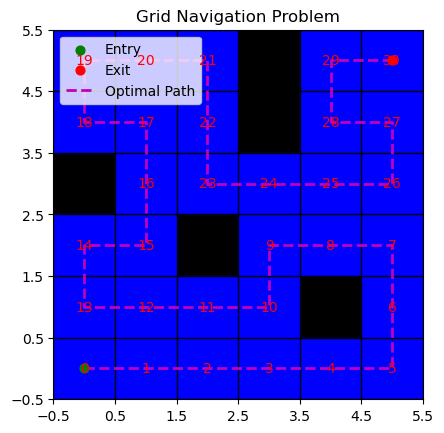

In [16]:
plot_grid(optimal_path, 0.1, grid, obstacle_cells, entry_cell, exit_cell)

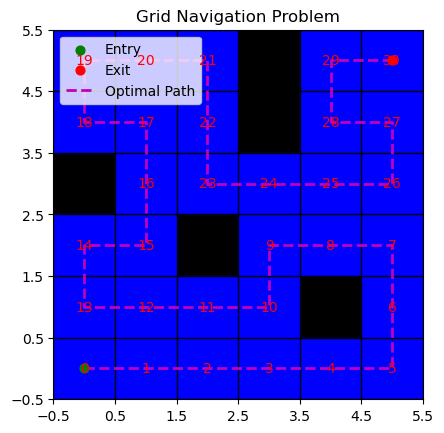

In [17]:
visited = [[False] * grid_size for _ in range(grid_size)]
ham_path = []
ham_path = findPath(ini_obs_map, obstacle_cells, entry_cell, exit_cell, visited, ham_path, grid_size, grid_size)
if ham_path:
    plot_grid(ham_path, 0.1, grid, obstacle_cells, entry_cell, exit_cell)

In [ ]:
plot_grid(paths_history[np.argmax(rewards_history)], 0.1, grid, obstacle_cells, entry_cell, exit_cell)
print('Path reward: ', np.argmax(rewards_history))